# PSM3 Data Aquisition

This notebook aquires high resolution (5min) PSM3 irradiance data and saves the psm3_weatherframe into a file for future use.



In [1]:
from pvlib import iotools
from pvlib.location import Location
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# setup locations
locations = {}

# latitude, longitude, name, altitude, timezone
locations['Hood River'] = (45.71417626139969, -121.5154782530592, 'Hood River', 27, 'Etc/GMT+8')
locations['Albuquerque'] = (35.1, -106.6, 'Albuquerque', 1500, 'Etc/GMT+7')
locations['San Francisco'] = (37.7749, -122.4194, 'San Francisco', 61, 'Etc/GMT+8')
locations['Miami'] = (25.7617, -80.1918, 'Miami', 2, 'Etc/GMT+5')
locations['Denver'] = (39.7, -105.0, 'Denver', 1600, 'Etc/GMT+7')
locations['Phoenix'] = (33.5, -112.0, 'Phoenix', 340, 'Etc/GMT+7')
locations['Los Angeles'] = (34.0522, -118.2437, 'Los Angeles', 85, 'Etc/GMT+8')
locations['San Antonio'] = (29.4241, -98.4936, 'San Antonio', 200, 'Etc/GMT+6')
locations['Washington'] = (38.9072, -77.0369, 'Washington', 10, 'Etc/GMT+5')
locations['Cincinnati'] = (39.1031, -84.512, 'Cincinnati', 150, 'Etc/GMT+5')
locations['Hatteras'] = (35.2, -75.7, 'Hatteras', 1, 'Etc/GMT+5')
locations['Key West'] = (24.6, -81.8, 'Key West', 1, 'Etc/GMT+5')
locations['Death Valley'] = (36.46301553642297, -116.87362879671764, 'Death Valley', -60, 'Etc/GMT+8')


In [3]:
# Iterate through locations and save PSM3 data
for location in locations:
    latitude, longitude, name, altitude, timezone = locations[location]

    location = Location(
        latitude,
        longitude,
        name=name,
        altitude=altitude,
        tz=timezone,
        )

    # set PSM3 Parameters
    email = 'natecostello@gmail.com'
    api_key='qdp5rTURyNlFwsau1LcTuenQ2h7bcCtQ1dOzOojN'
    interval = 5
    map_variables = True
    names = '2022'

    # get PSM3 data
    psm3_weather, psm3_weather_meta_data = iotools.get_psm3(
        latitude,
        longitude,
        api_key,
        email,
        names=names,
        interval=interval,
        map_variables=map_variables,
        leap_day=True
    )

    filename = 'psm3_' + name + '_' + names + '.csv'

    # save PSM3 data
    psm3_weather.to_csv(filename, index=True)
    print('Saved ' + filename)



Saved psm3_Hood River_2022.csv
Saved psm3_Albuquerque_2022.csv
Saved psm3_San Francisco_2022.csv
Saved psm3_Miami_2022.csv
Saved psm3_Denver_2022.csv
Saved psm3_Phoenix_2022.csv
Saved psm3_Los Angeles_2022.csv
Saved psm3_San Antonio_2022.csv
Saved psm3_Washington_2022.csv
Saved psm3_Cincinnati_2022.csv
Saved psm3_Hatteras_2022.csv
Saved psm3_Key West_2022.csv
Saved psm3_Death Valley_2022.csv


In [4]:
# Hood River
hood_river = locations['Hood River']
latitude, longitude, name, altitude, timezone = hood_river

location = Location(
    latitude,
    longitude,
    name=name,
    altitude=altitude,
    tz=timezone,
    )

# organize PSM3 Parameters
email = 'natecostello@gmail.com'
api_key='qdp5rTURyNlFwsau1LcTuenQ2h7bcCtQ1dOzOojN'
interval = 5
map_variables = True
names = '2022'



In [5]:

# get PSM3 data
psm3_weather, psm3_weather_meta_data = iotools.get_psm3(
    latitude,
    longitude,
    api_key,
    email,
    names=names,
    interval=interval,
    map_variables=map_variables,
    leap_day=True
)


In [6]:
# get 5 minute clear sky data for the location
times = pd.date_range('2022-01-01 00:00', '2022-12-31 23:59', freq='5min', tz=location.tz)
clearsky_weather = location.get_clearsky(times)

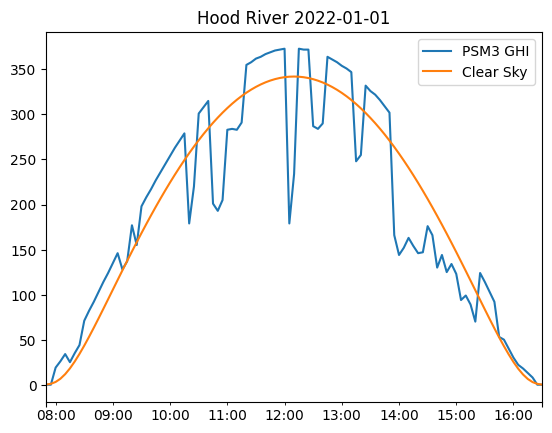

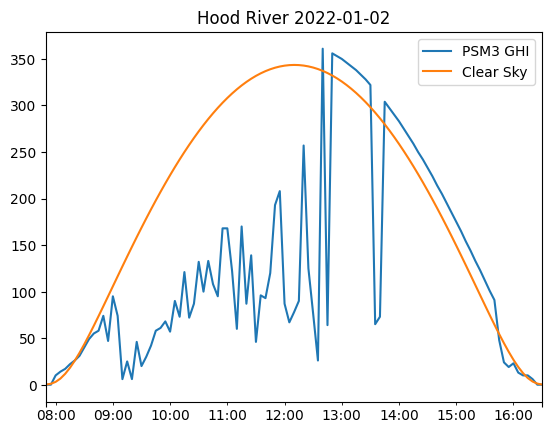

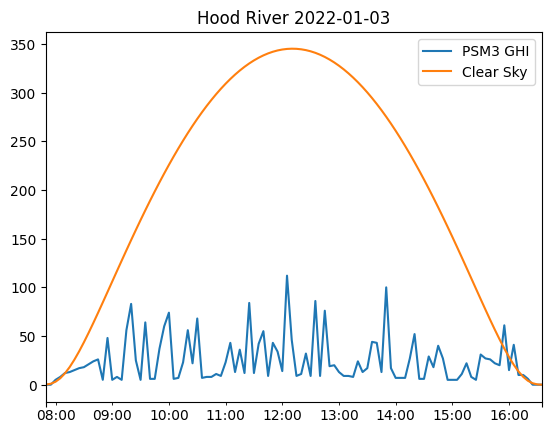

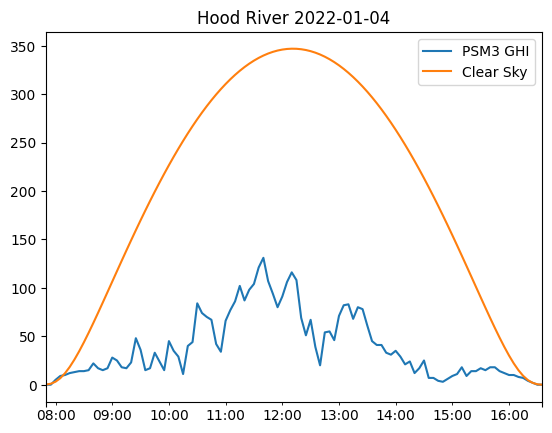

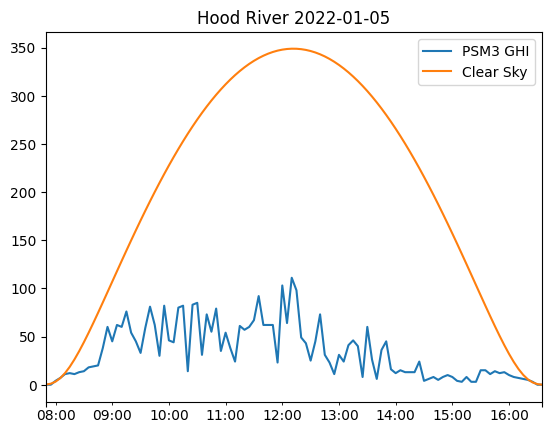

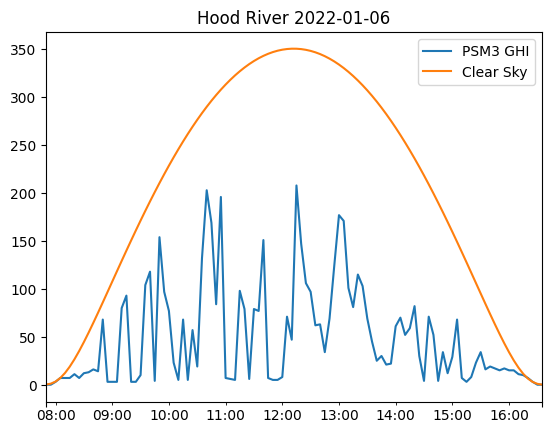

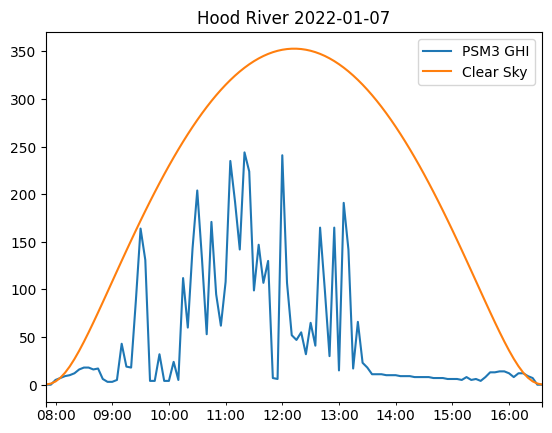

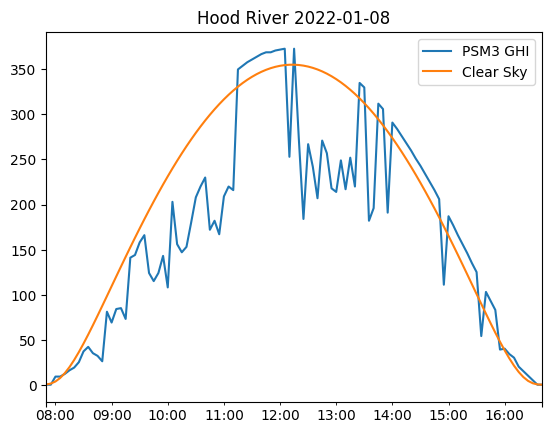

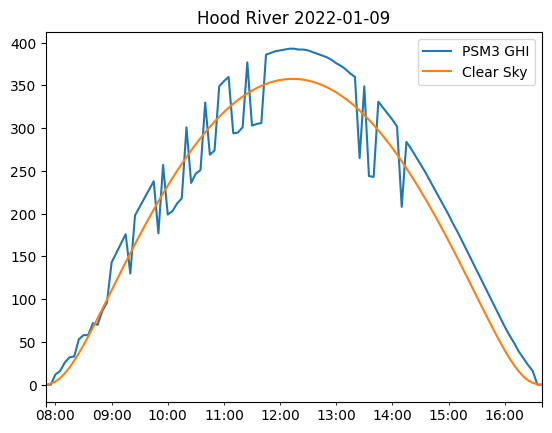

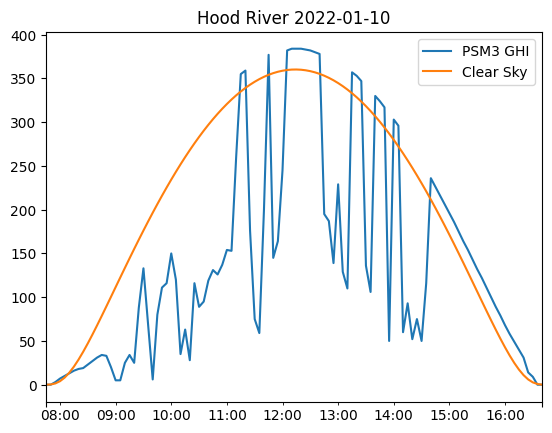

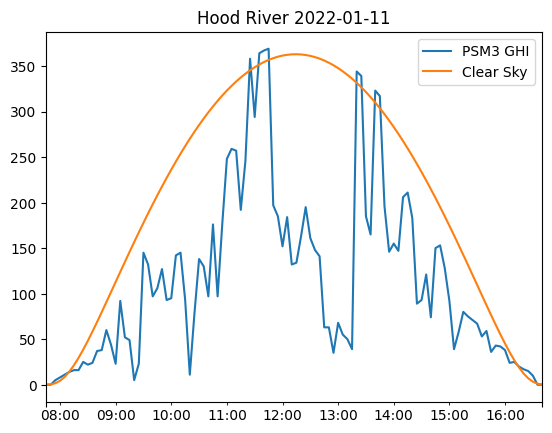

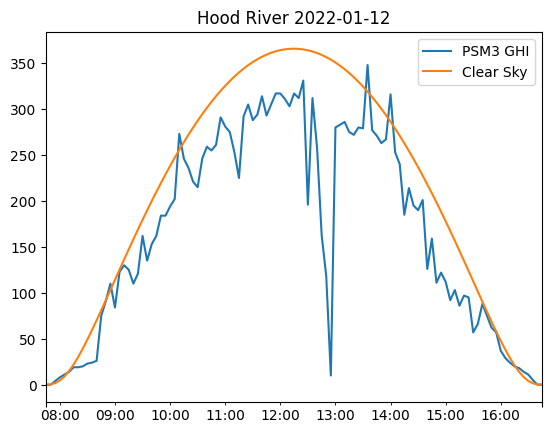

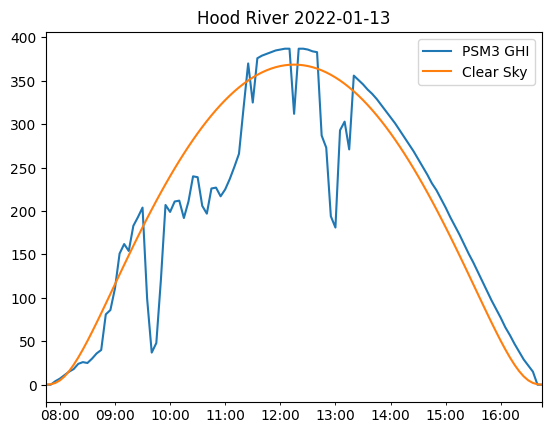

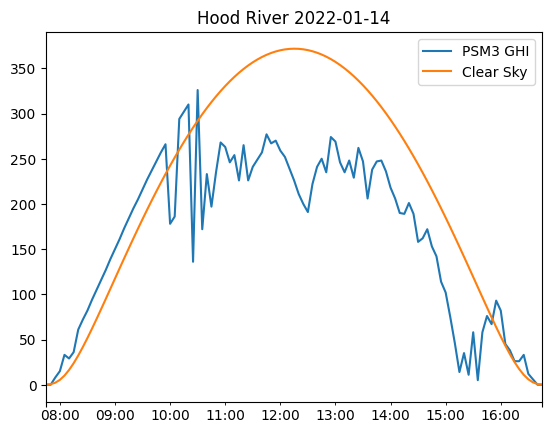

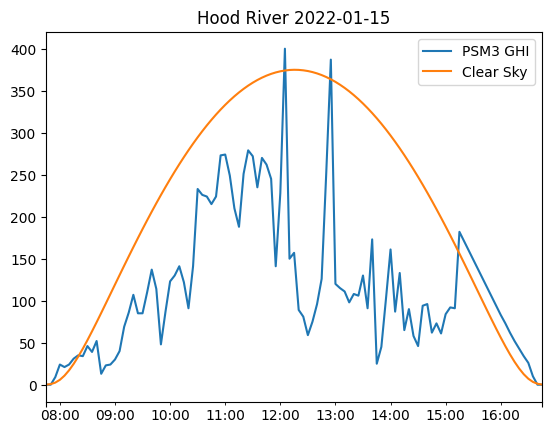

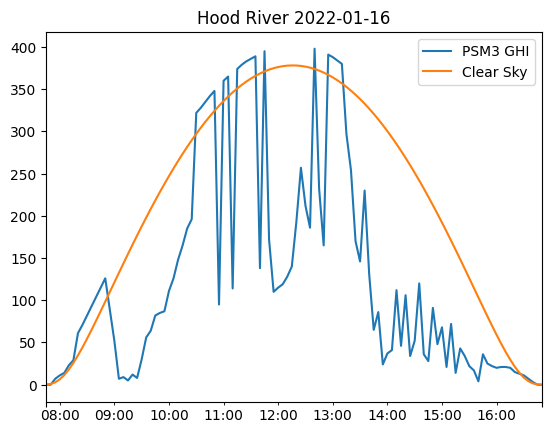

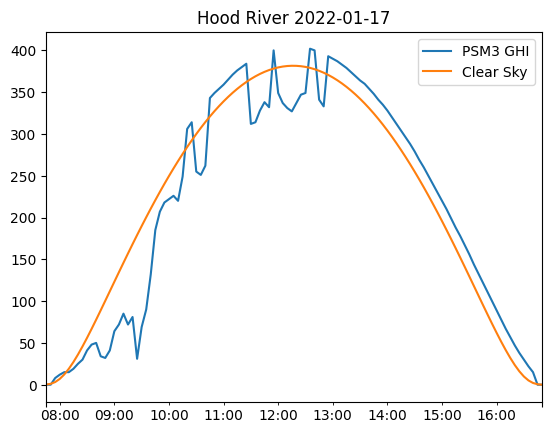

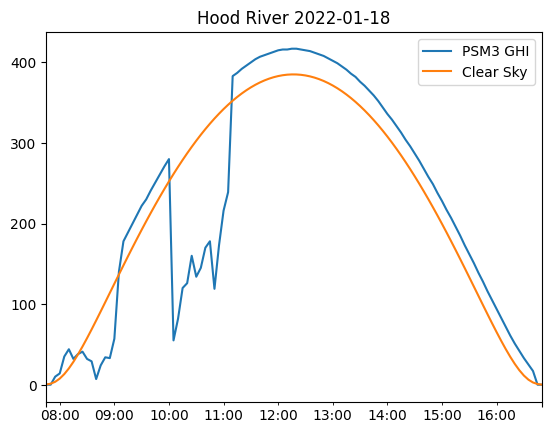

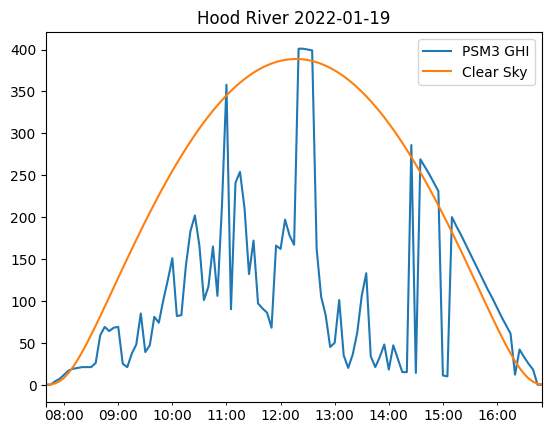

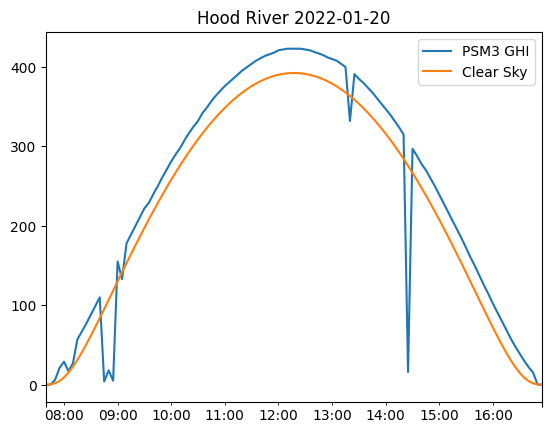

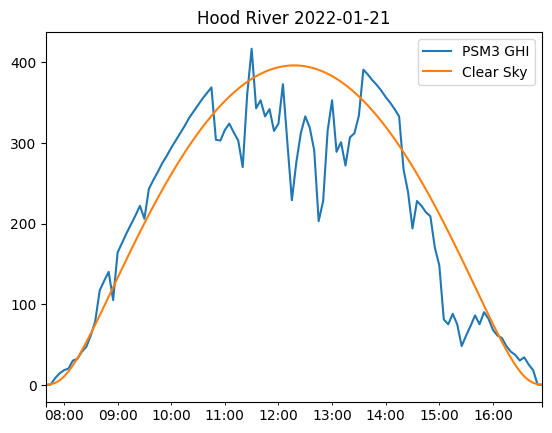

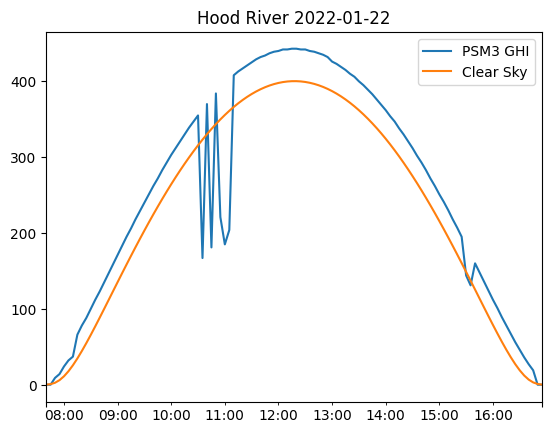

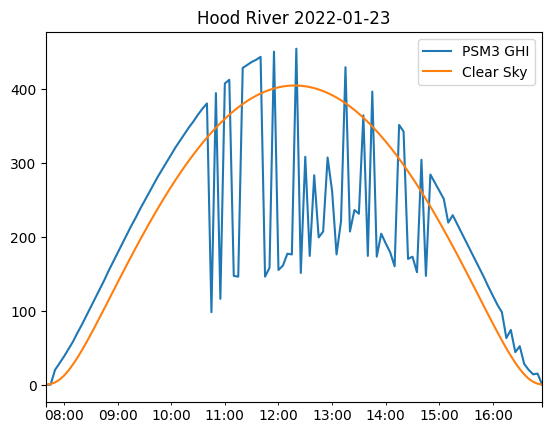

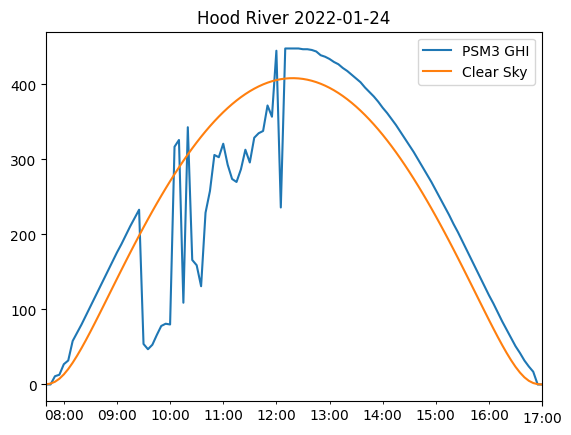

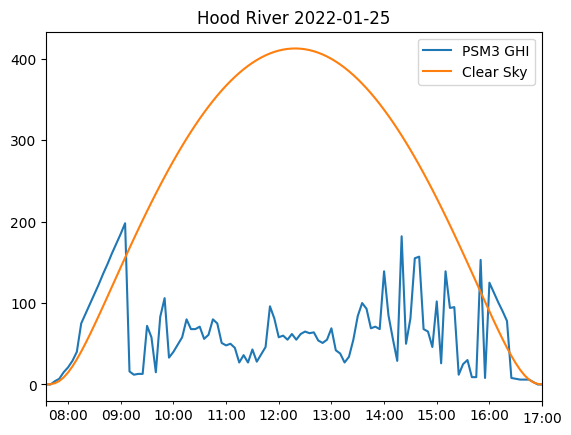

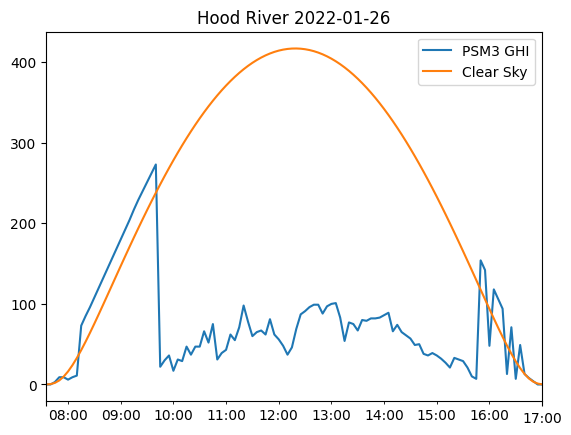

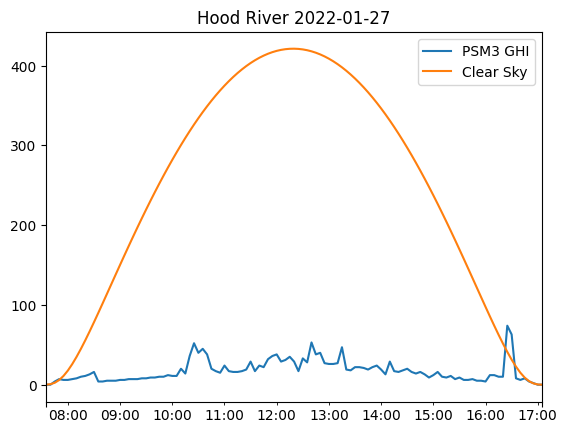

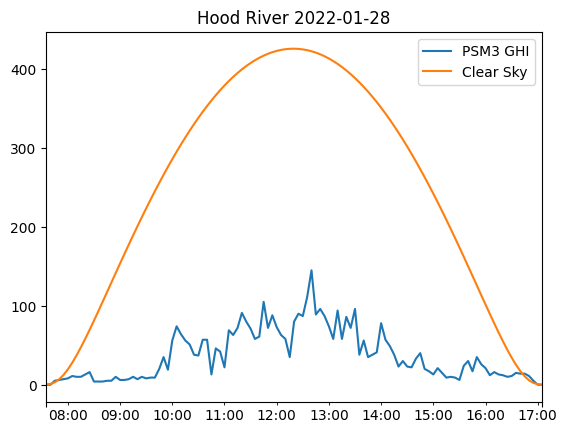

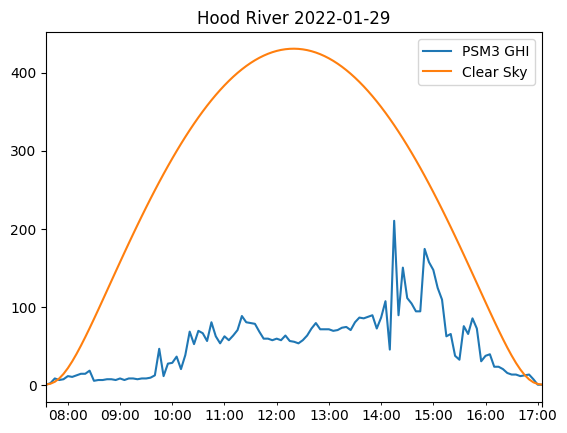

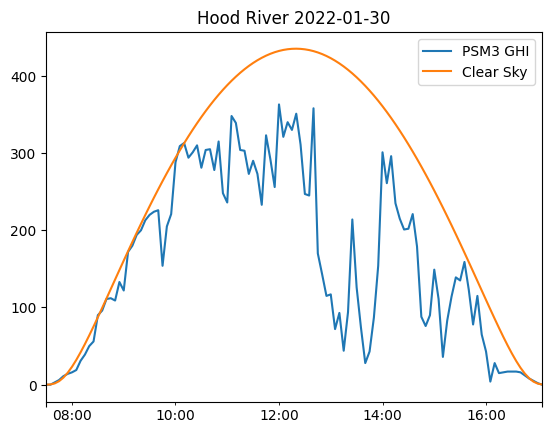

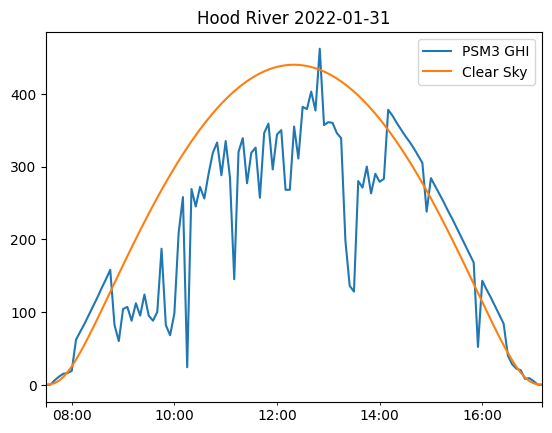

In [9]:
# Create a date range for January
dates = pd.date_range(start='2022-01-01', end='2022-01-31', tz=location.tz)

# Iterate over the dates
for date in dates:
    # Localize the date to the specified timezone
    
    # Create a DatetimeIndex from the localized_date
    date_index = pd.DatetimeIndex([date])
    
    # Get the sunrise and sunset times for the date
    sun_times = location.get_sun_rise_set_transit(date_index)
    
    # Extract the sunrise and sunset times and convert them to timestamps
    # sunrise = pd.Timestamp(sun_times['sunrise'].values[0], tz=location.tz)
    # sunset = pd.Timestamp(sun_times['sunset'].values[0], tz=location.tz)
    sunrise = sun_times['sunrise'].iloc[0]
    sunset = sun_times['sunset'].iloc[0]
    
    # Slice the data and clearsky_weather DataFrames to the range from sunrise to sunset
    psm3_weather_slice = psm3_weather.loc[sunrise:sunset]
    clearsky_weather_slice = clearsky_weather.loc[sunrise:sunset]
    # Create a plot of the 'ghi' column of the sliced psm3_weatherFrames
    fig, ax = plt.subplots()
    psm3_weather_slice['ghi'].plot(ax=ax, label='PSM3 GHI')
    clearsky_weather_slice['ghi'].plot(ax=ax, label='Clear Sky')
    
    # Add a title to the plot
    ax.set_title(location.name + ' ' + date.strftime('%Y-%m-%d'))
    
    # Add a legend to the plot
    ax.legend()
    
    # Show the plot
    plt.show()